In [670]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.decomposition import PCA

In [580]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [582]:
# There are no null values in the dataset.

In [583]:
df['animal name'].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [584]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [585]:
# looks like there are 7 types of animals.

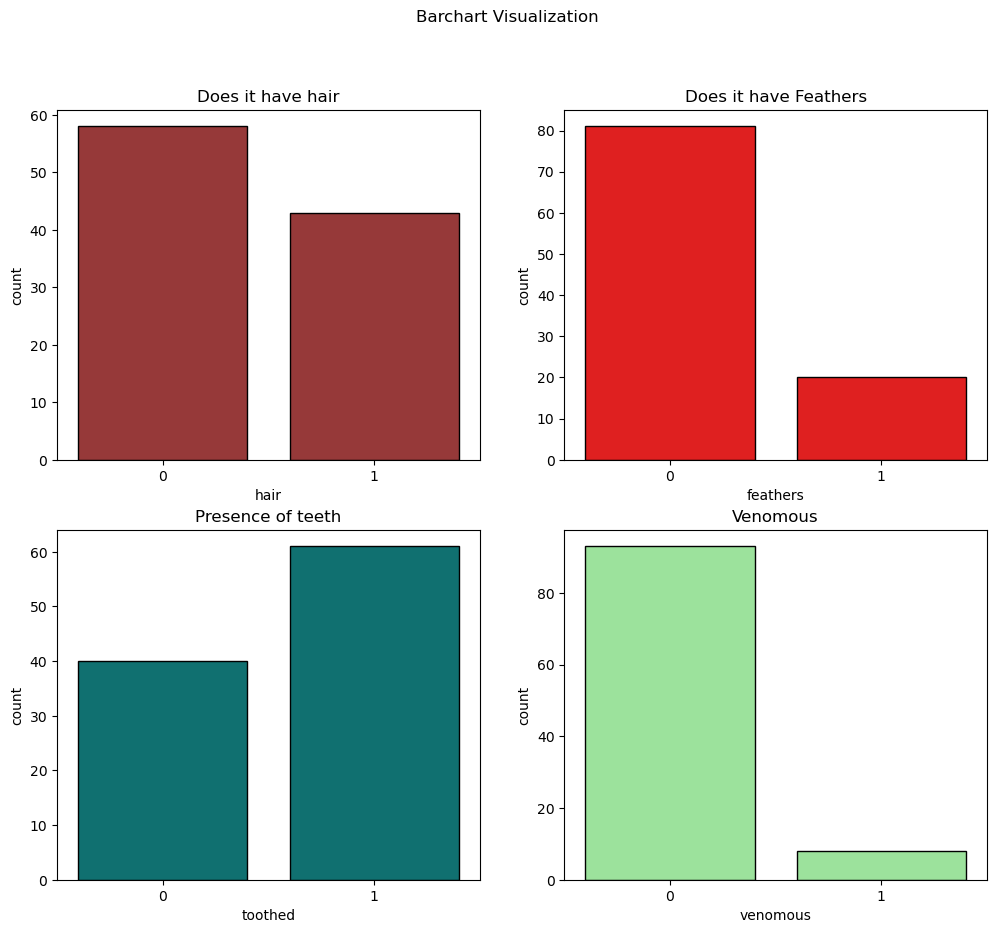

In [586]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
plt.suptitle('Barchart Visualization')

sns.barplot(df['hair'].value_counts(),ax=axes[0,0],color='brown',edgecolor='black')
axes[0,0].set_title('Does it have hair')

sns.barplot(df['feathers'].value_counts(),ax=axes[0,1],color='red',edgecolor='black')
axes[0,1].set_title('Does it have Feathers')

sns.barplot(df['toothed'].value_counts(),ax=axes[1,0],color='teal',edgecolor='black')
axes[1,0].set_title('Presence of teeth')

sns.barplot(df['venomous'].value_counts(),ax=axes[1,1],color='lightgreen',edgecolor='black')
axes[1,1].set_title('Venomous')

plt.show()

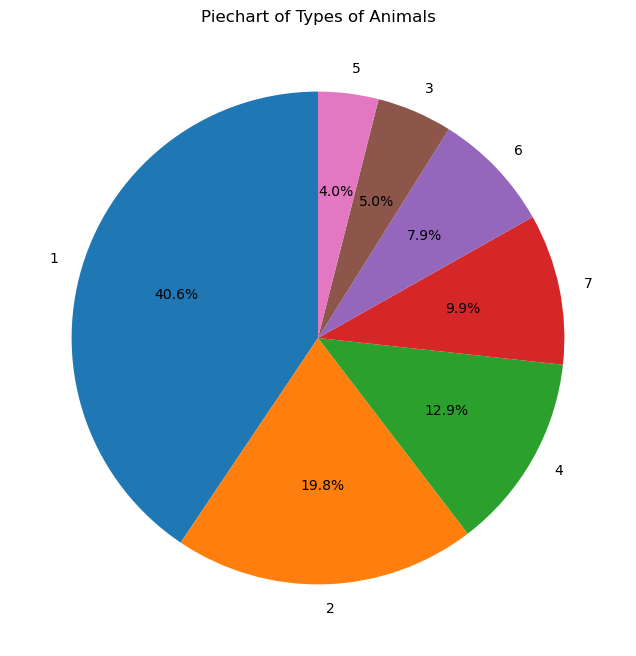

In [587]:
labels = df['type'].value_counts().index
figure = plt.figure(figsize=(10,8))
plt.pie(df['type'].value_counts(),labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Piechart of Types of Animals')
plt.show()

<Axes: title={'center': 'Corelation Matrix of Zoo data'}>

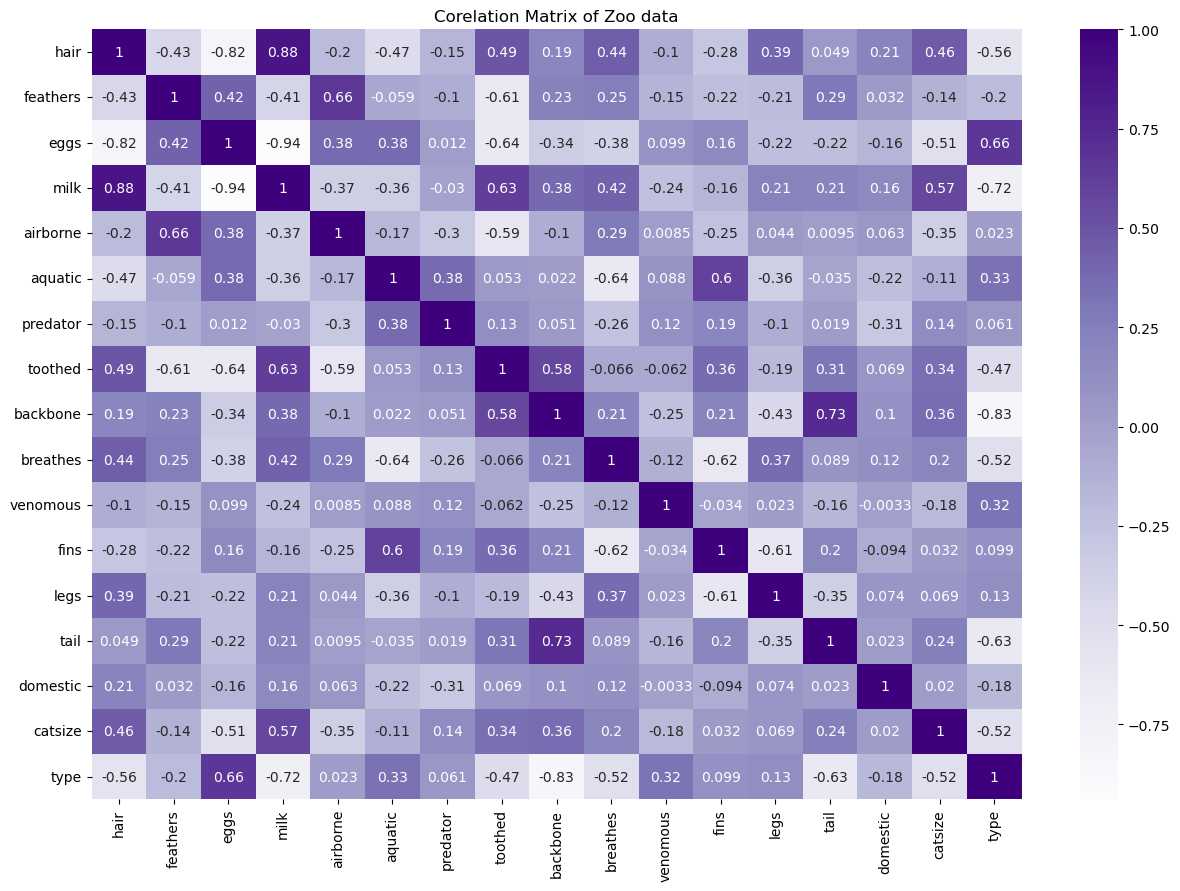

In [588]:
figure = plt.figure(figsize=(15,10))
plt.title('Corelation Matrix of Zoo data')
sns.heatmap(df.iloc[:,1:].corr(),annot=True,cmap='Purples')

In [561]:
# We can find many interesting correlations in this dataset like backbone and tail are highly related, fethers and airborne are also highly related and
# another interesting finding is that type is higly related with backbone.

In [604]:
X = df.iloc[:,1:17]
y = df['type']

In [606]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [608]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [614]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=897)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80,)
(21,)


In [618]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_test_pred = knn.predict(X_test)

In [648]:
print("accuracy of the model is : ",accuracy_score(y_test,y_test_pred))
print("precision of the model is : ",precision_score(y_test,y_test_pred,average='macro'))
print('recall of the model is : ',recall_score(y_test,y_test_pred,average='macro'))
print('F1 Score of the model is : ',f1_score(y_test,y_test_pred,average='macro'))

accuracy of the model is :  0.9523809523809523
precision of the model is :  0.95
recall of the model is :  0.9772727272727273
F1 Score of the model is :  0.9603174603174602


In [650]:
# As we can see the model performs really well.

In [652]:
df['Type_pred'] = knn.predict(X)
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,Type_pred
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,7


In [654]:
# Lets visualize the decision boundary by using dimensionaliy reduction technique pca

In [662]:
x = X.values
x

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [660]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [664]:
# we need to convert dataframe into array to apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca

array([[ 1.35102851,  1.05853312],
       [ 1.30663411,  1.20834446],
       [-3.13165517, -0.25220045],
       [ 1.35102851,  1.05853312],
       [ 1.27729583,  1.22574951],
       [ 1.30663411,  1.20834446],
       [ 1.32106857,  1.25764259],
       [-3.08788243, -0.22030736],
       [-3.13165517, -0.25220045],
       [ 1.37362871,  0.77104359],
       [ 1.27729583,  1.22574951],
       [-0.85560368, -0.96028666],
       [-3.13165517, -0.25220045],
       [-2.73070318, -0.94005387],
       [ 1.04663381, -1.39432518],
       [ 2.98225622, -1.55844133],
       [-0.89937642, -0.99217974],
       [ 1.30663411,  1.20834446],
       [-3.11048263,  0.06718217],
       [-2.9060239 ,  1.07047047],
       [-0.85560368, -0.96028666],
       [-0.96394596, -1.13562381],
       [ 1.30663411,  1.20834446],
       [-0.8488656 , -0.69020218],
       [ 3.18526565, -1.33773307],
       [ 1.00669275, -0.66157251],
       [ 1.00893156, -0.7117018 ],
       [-0.64144201,  0.8398805 ],
       [ 1.30663411,

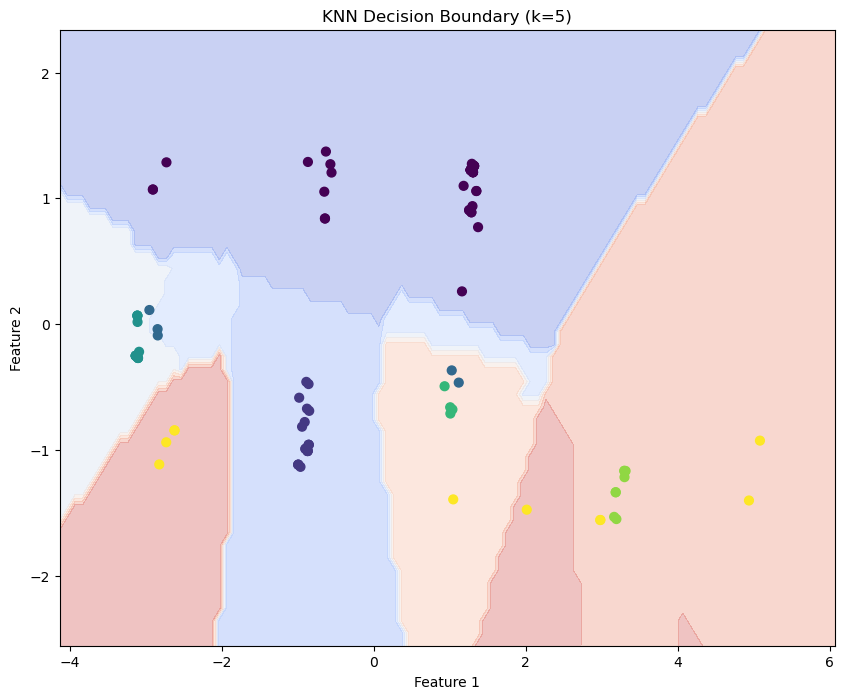

In [690]:
knn.fit(x_pca,y)
# create a meshgrid of points
x_min,x_max = x_pca[:,0].min()-1,x_pca[:,0].max()+1
y_min,y_max = x_pca[:,1].min()-1,x_pca[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min,y_max,0.1))
# Predict on grid
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot
plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Decision regions
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, s=40)  # Data points
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 1. What are the key hyperparameters in KNN?

# 2. What distance metrics can be used in KNN?